In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
utility = pd.read_csv("energy_pau.csv")

def clean_energy(x):
        
    if isinstance(x, str):
        x = re.sub(r'[\[\]\'\"]', '', x).strip()

    try:
        return float(x)
    except:
        return None

utility['energy'] = utility['energy'].apply(clean_energy)
utility['energy'] = pd.to_numeric(utility['energy'], errors='coerce').astype('int64')

print(utility.head())
print(utility.dtypes)

   energy  hr  day  month    yr
0  953691  11   17      8  2025
1  953709  12   17      8  2025
2  953805  16   17      8  2025
3  953889  21   17      8  2025
4  953977   4   18      8  2025
energy    int64
hr        int64
day       int64
month     int64
yr        int64
dtype: object


In [3]:
utility.shape

(211, 5)

In [4]:
utility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   energy  211 non-null    int64
 1   hr      211 non-null    int64
 2   day     211 non-null    int64
 3   month   211 non-null    int64
 4   yr      211 non-null    int64
dtypes: int64(5)
memory usage: 8.4 KB


In [6]:
utility.columns

Index(['energy', 'hr', 'day', 'month', 'yr'], dtype='object')

In [27]:
len(utility.columns)

5

In [28]:
utility.shape

(211, 5)

In [29]:
utility.isna().sum()

energy    0
hr        0
day       0
month     0
yr        0
dtype: int64

In [10]:
invalid_days = utility[(utility['day'] < 1) | (utility['day'] > 31)]
print("Invalid days found:", invalid_days.shape[0])

invalid_months = utility[(utility['month'] < 1) | (utility['month'] > 12)]
print("Invalid months found:", invalid_months.shape[0])

invalid_hours = utility[(utility['hr'] < 0) | (utility['hr'] > 24)]
print("Invalid hours found:", invalid_hours.shape[0])


Invalid days found: 0
Invalid months found: 0
Invalid hours found: 0


In [11]:
utility['diff'] = utility['energy'].diff()  #adding diff column

print(utility.head(10))

   energy  hr  day  month  year       date   diff
0  953691  11   17      8  2025 2025-08-17    NaN
1  953709  12   17      8  2025 2025-08-17   18.0
2  953805  16   17      8  2025 2025-08-17   96.0
3  953889  21   17      8  2025 2025-08-17   84.0
4  953977   4   18      8  2025 2025-08-18   88.0
5  953977  17   18      8  2025 2025-08-18    0.0
6  953977  19   18      8  2025 2025-08-18    0.0
7  954391  22   18      8  2025 2025-08-18  414.0
8  954459  24   18      8  2025 2025-08-18   68.0
9  954636   7   19      8  2025 2025-08-19  177.0


In [7]:
utility= utility.rename(columns={'yr' : 'year'})
utility['date'] = pd.to_datetime(utility[['year', 'month', 'day']], errors ='coerce')

invalid_dates = utility[utility['date'].isna()]
print("invalid dates found:", invalid_dates.shape[0])
print(invalid_dates.head(10))

invalid dates found: 0
Empty DataFrame
Columns: [energy, hr, day, month, year, date]
Index: []


In [33]:
utility.head(10)

,energy,hr,day,month,yr,diff
0,953691,11,17,8,2025,NaN
1,953709,12,17,8,2025,18.0
2,953805,16,17,8,2025,96.0
3,953889,21,17,8,2025,84.0
4,953977,4,18,8,2025,88.0
5,953977,17,18,8,2025,0.0
6,953977,19,18,8,2025,0.0
7,954391,22,18,8,2025,414.0
8,954459,24,18,8,2025,68.0
9,954636,7,19,8,2025,177.0


In [16]:
utility['ma3'] = utility['diff'].fillna(utility['diff'].rolling(3, min_periods=1).mean())
utility['ma7'] = utility['diff'].fillna(utility['diff'].rolling(7, min_periods=1).mean())

utility['diff_filled'] = utility['diff'].fillna(utility['ma3']). fillna(utility['ma7'])

if pd.isna(utility.loc[0, 'diff_filled']):
    utility.loc[0, 'diff_filled'] = 0

utility['diff'] = utility['diff'].fillna(0).astype(int)
utility['diff_filled']= utility['diff_filled'].astype(int)

numeric_cols = utility.select_dtypes(include='number').columns
utility[numeric_cols]=utility[numeric_cols].fillna(0).astype(int)
utility.head(15)

,energy,hr,day,month,year,date,diff,ma3,ma7,diff_filled
0,953691,11,17,8,2025,2025-08-17,0,0,0,0
1,953709,12,17,8,2025,2025-08-17,18,18,18,18
2,953805,16,17,8,2025,2025-08-17,96,96,96,96
3,953889,21,17,8,2025,2025-08-17,84,84,84,84
4,953977,4,18,8,2025,2025-08-18,88,88,88,88
5,953977,17,18,8,2025,2025-08-18,0,0,0,0
6,953977,19,18,8,2025,2025-08-18,0,0,0,0
7,954391,22,18,8,2025,2025-08-18,414,414,414,414
8,954459,24,18,8,2025,2025-08-18,68,68,68,68
9,954636,7,19,8,2025,2025-08-19,177,177,177,177


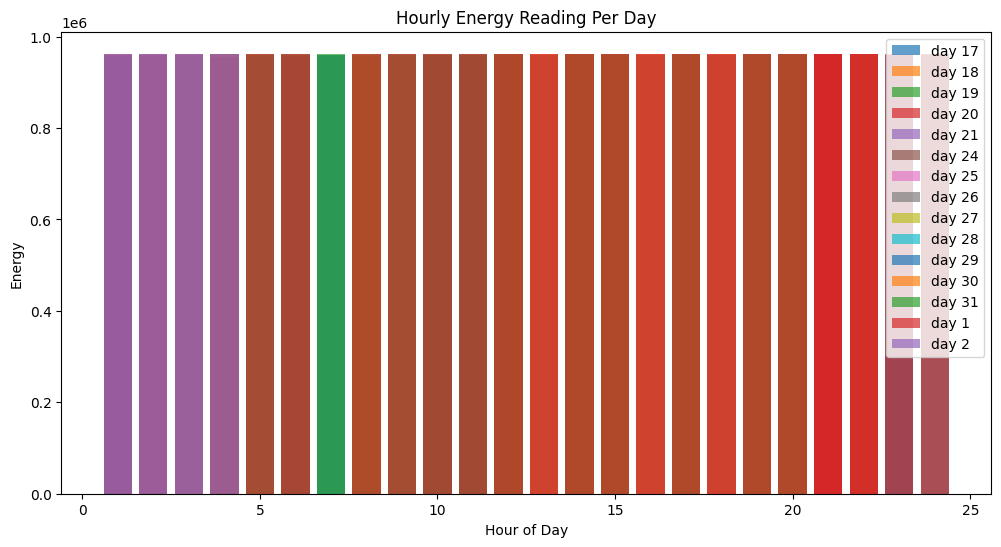

In [17]:
plt.figure(figsize=(12,6))
for day in utility['day'].unique():
    subset = utility[utility['day']==day]
    plt.bar(subset['hr'], subset['energy'], label=f'day {day}', alpha=0.7)

plt.xlabel('Hour of Day')
plt.ylabel('Energy')
plt.title('Hourly Energy Reading Per Day')
plt.legend()
plt.show()

   month  day    energy
0      8   17   3815094
1      8   18   4770781
2      8   19   7638942
3      8   20  12419894
4      8   21   1911349


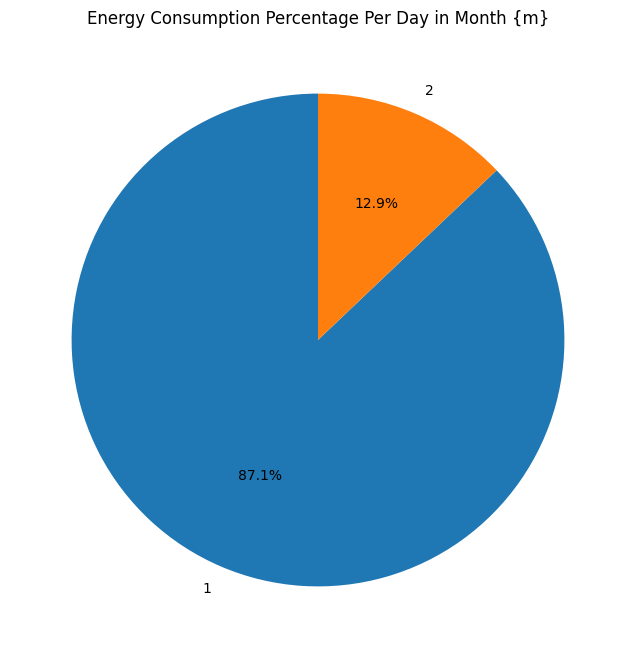

In [18]:
daily_energy = utility.groupby(['month', 'day'])['energy'].sum().reset_index()
print(daily_energy.head())

Months = daily_energy['month'].unique()
for m in Months:
    month_data = daily_energy[daily_energy['month'] == m]
plt.figure(figsize=(8,8))
plt.pie(month_data['energy'], labels=month_data['day'], autopct='%1.1f%%', startangle=90)
plt.title('Energy Consumption Percentage Per Day in Month {m}')
plt.show()

In [19]:
utility.to_csv("PAU_energy_cleaned.csv", index=False)
print("Data Cleaning and Visualization Completed. Cleaned CSV saved as PAU_energy_cleaned.csv")

Data Cleaning and Visualization Completed. Cleaned CSV saved as PAU_energy_cleaned.csv
